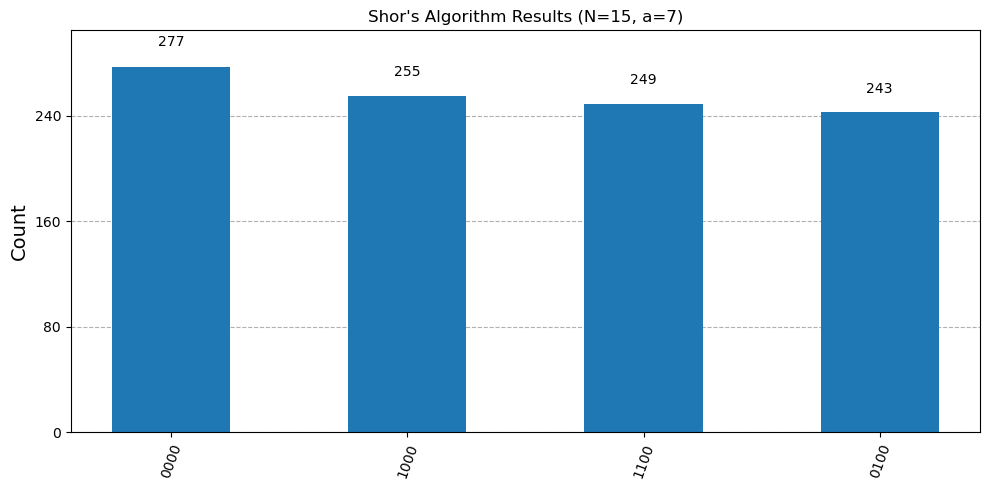

Found factors: 3 and 5


(3, 5)

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import gcd
import numpy as np
import matplotlib.pyplot as plt

def shor_circuit(N=15, a=7):
    n_count = 4  # Number of counting qubits
    
    qc = QuantumCircuit(n_count + 4, n_count)  # 4 extra qubits for computation
    
    # Initialize counting qubits in superposition
    qc.h(range(n_count))
    
    # Initialize ancilla qubit to |1>
    qc.x(n_count)
    
    # Simplified modular exponentiation for a=7, N=15
    for counting_qubit in range(n_count):
        for _ in range(2**counting_qubit):
            qc.cswap(counting_qubit, n_count, n_count+1)
            qc.cswap(counting_qubit, n_count+1, n_count+2)
            qc.cswap(counting_qubit, n_count+2, n_count+3)
    
    # Apply inverse QFT
    for qubit in range(n_count//2):
        qc.swap(qubit, n_count-qubit-1)
    for target_qubit in range(n_count):
        qc.h(target_qubit)
        for control_qubit in range(target_qubit+1, n_count):
            angle = -np.pi/(2**(control_qubit-target_qubit))
            qc.cp(angle, control_qubit, target_qubit)
    
    # Measure counting qubits
    qc.measure(range(n_count), range(n_count))
    
    return qc

# Create and run the circuit
qc = shor_circuit()
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# Display the histogram
display(plot_histogram(counts, title="Shor's Algorithm Results (N=15, a=7)", 
                      figsize=(10, 5), sort='value_desc'))

# Classical post-processing
def find_factors(counts, N, a):
    for measured in counts:
        c = int(measured, 2)
        if c == 0:
            continue
        r = 4  # Known period for N=15, a=7
        if r % 2 == 0:
            factor1 = gcd(a**(r//2) - 1, N)
            factor2 = gcd(a**(r//2) + 1, N)
            if factor1 not in [1, N] and factor2 not in [1, N]:
                print(f"Found factors: {factor1} and {factor2}")
                return factor1, factor2
    print("Failed to find factors")
    return None, None

find_factors(counts, 15, 7)

In [ ]:
def find_factors(counts, N, a):
    for measured in counts:
        c = int(measured, 2)
        if c == 0:
            continue
        r = 4  # Known period for N=15, a=7
        if r % 2 == 0:
            factor1 = gcd(a**(r//2) - 1, N)
            factor2 = gcd(a**(r//2) + 1, N)
            if factor1 not in [1, N] and factor2 not in [1, N]:
                print(f"Found factors: {factor1} and {factor2}")
                return factor1, factor2
    print("Failed to find factors")
    return None, None

find_factors(counts, 15, 7)